## Intro & Motivation

A lot of results in number theory (especially analytic number theory) reveal fundamental patterns in real numbers, rational/irrational numbers, integers, and probably most importantly, primes. Some of the patterns can be nicely visualized using computational methods so that people like me can (hopefully) be convinced that these patterns are indeed correct. <br>
A couple of examples are presented in this notebook.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

## 1. Weyl's Equidistribution Theorem
People are very interested in analyzing sequences in $R$. In the context of real analysis, people usually start by considering the convergence of such sequence. While convergence tells us many things about the sequence, especially the "tail" of the sequence, many sequences tend not to be convergent and there all still a lot of interesting things to study about these sequences. One thing that people are interested in is characterizing the spread of a sequence of real numbers over an interval. To make this precise, we have the following definition. <br>

**Definition 1.1:** A sequence of real numbers $\{\xi_n\}_{n=1}^{\infty}$ in $[0,1)$ is **equidistributed** if for every interval $(a, b)\subset[0, 1)$, we have

$$
\lim_{N\to\infty} \frac{\#\{1\leq n\leq N: \xi_n\in(a,b)\}}{N} = b-a
$$

The equidistribution of a sequence essentially tells us that the sequence is spread quite evenly over an interval, and every subinterval gets it own "share" of the sequence. It is obvious that this is a much stronger assertion that the sequence, viewed as a set, is dense in an interval. <br>
Another thing that we need to define before getting into Weyl's Equidistribution Theorem is the **fractional part** of a number. The reason that we examine the fractional part is that it brings us naturally into the interval $[0, 1)$. <br>

**Definition 1.2:** The **integer part** of a real number $x$ is the largest integer that is less than or equal to x, and we use $[x]$ to denote the integer part of $x$. The **fractional part** of a real number $x$ is defined as $x - [x]$, usually denoted by $\{x\}$, but for the sake of clarity, denoted by $\langle x\rangle$ here.

Now we are ready to state Weyl's Equidistribution Theorem. <br>

**Theorem 1.3 (Weyl's Equidistribution Theorem):** If $\gamma$ is an irrational number, then the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle n\gamma\rangle$, is equidistributed in $[0, 1)$.

I will not prove this theorem here since it requires some machinery in real analysis and fourier analysis. The idea is to reformulate the problem in terms of convergence of functions involving the characteristic function. Then approximate characteristic functions using continuous functions (trigonometric polynomials) and apply some convergence theorems for continuous functions. <br>
One thing to note is that we do need $\gamma$ to be irrational here since for a rational number $\alpha$, write $\alpha = p/q$, then consider the first q terms in the sequence $\{\langle n\alpha\rangle\}_{n=1}^{\infty}: \langle \frac{p}{q}\rangle, \langle \frac{2p}{q}\rangle,..., \langle \frac{qp}{q}\rangle$. The next term is $\langle \frac{(q+1)p}{q}\rangle = \langle 1+\frac{p}{q}\rangle = \langle \frac{p}{q}\rangle$. Therefore the sequence is going to repeat itself starting from here. <br>
And for $\alpha$ an irrational number, the sequence is never going to repeat itself, in fact, we cannot have repeated terms in the sequence. To see this, suppose $\langle n_1\alpha\rangle = \langle n_2\alpha\rangle$ for some integers $n_1, n_2$, this means $n_1\alpha - n_2\alpha$ is an integer since both have the same fractional part, so $\alpha$ is rational, contradiction. <br>
Alright, this is probably where I should stop from talking about more math. Let's visualize the equidistribution of this sequence. <br>

To do this, we need to to generate first $N$ terms of the sequence $\{\langle n\gamma\rangle\}_{n=1}^{\infty}$ 

In [3]:
gamma = np.sqrt(3)
N = 10000

def first_N_terms_weyl(gamma, N):
    """generate first N terms of the sequence in Weyl's equidistribution theorem."""
    result = []
    for i in np.arange(1, N + 1):
        result.append(i * gamma - math.floor(i * gamma))
    return result

sequence_weyl = first_N_terms_weyl(gamma, N)

The following is a simple pipeline that generates visualization of distribution of a sequence. It includes a scatter plot of the sequence, and the behavior of $\frac{\#\{1\leq n\leq N: \xi_n\in(a,b)\}}{N}$ for the first $N$ terms of the sequence over some arbitrary intervals.  

In [4]:
def within_interval(sequence, a, b):
    """Determine how many terms in a sequence is within the interval (a,b). Return the interval (keep 4
    decimal places), number of terms in a sequence in (a,b) and the limit b-a."""
    
    within = []
    for num in sequence:
        if (a < num) and (b > num):
            within.append(num)
    return (round(a, 4), round(b, 4)), len(within), b-a

def sample_interval(num_interval):
    """Generate num_interval - 1 random numbers in (0, 1) and use them to construct num_interval subintervals
    of (0, 1)."""
    
    sample = np.random.rand(num_interval - 1)
    sample = sorted(sample)
    return [0] + list(sample) + [1]

def visualize_equidistribution(sequence, num_interval, step_size):
    """Main visualization function. Give a scatter plot of the sequence. Also give the behavior of the quantity
    in question over a given number of random subintervals of (0, 1). The dashed line is the expected limit."""
    
    plt.figure()
    plt.scatter(sequence, list(range(len(sequence))))
    plt.yticks([])
    
    sample = sample_interval(num_interval)
    result = dict()
    
    steps = list(range(0, len(sequence), step_size))
    if len(sequence) % step_size != 1:
        steps.append(len(sequence) - 1)
        
    for i in range(len(steps) - 1):
        for j in range(len(sample) - 1):
            interval, actual, expected = within_interval(sequence[steps[i]:steps[i + 1]], sample[j], sample[j + 1])
            if j in result.keys():
                result[j][1].append((steps[i] * result[j][1][-1] + actual) / min(steps[i + 1], len(sequence))) 
            else:
                result[j] = interval, [actual / min(step_size, len(sequence))], expected
    
    num_plots = len(sample) - 1
    fig, ax = plt.subplots(nrows = math.ceil(num_interval / 3), ncols = 3, figsize=(15,15))
    for j in range(num_plots):
        row_id, col_id = j // 3, j % 3
        ax[row_id, col_id].plot(steps[1:], result[j][1])
        ax[row_id, col_id].axhline(result[j][2], color='black', ls = '--')
        ax[row_id, col_id].title.set_text(result[j][0])
        
    for j in range(num_plots, math.ceil(num_interval / 3) * 3):
        fig.delaxes(ax[j // 3][j % 3])

    plt.show()

Visualization of the sequence in Weyl's equidistribution theorem is as follows.

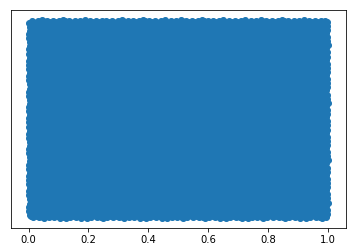

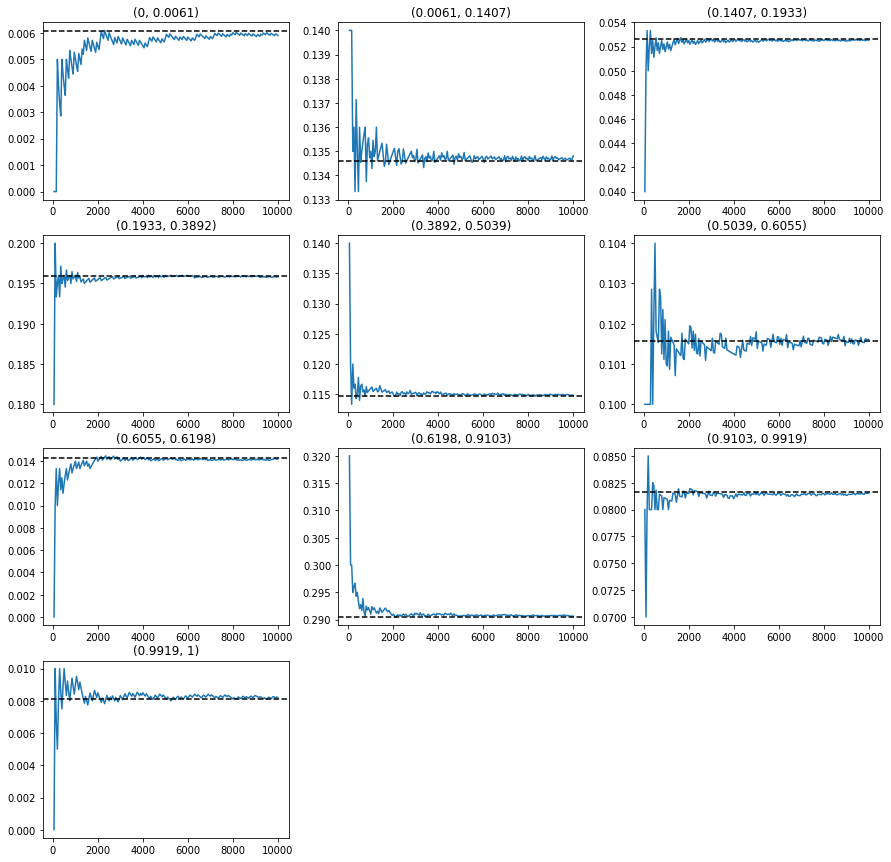

In [5]:
visualize_equidistribution(sequence_weyl, 10, 50)

The scatter plot shows that the sequence is pretty much evenly distributed in $(0, 1)$ and we can see the convergence of $\frac{\#\{1\leq n\leq N: \xi_n\in(a,b)\}}{N}$ over all the subintervals. This more or less convinces us that Weyl's equidistribution theorem holds true (well it has to be). <br>
A more thorough study of equidistribution reveals more examples of equidistributed/non-equidistributed sequences, which can also be easily visualized given the pipeline above.

**Proposition 1.4:** The sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \bigg \langle\left(\frac{1+\sqrt{5}}{2}\right)^n\bigg \rangle$, is not equidistributed in $[0, 1)$.

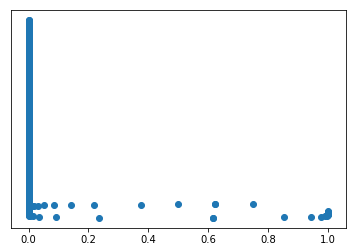

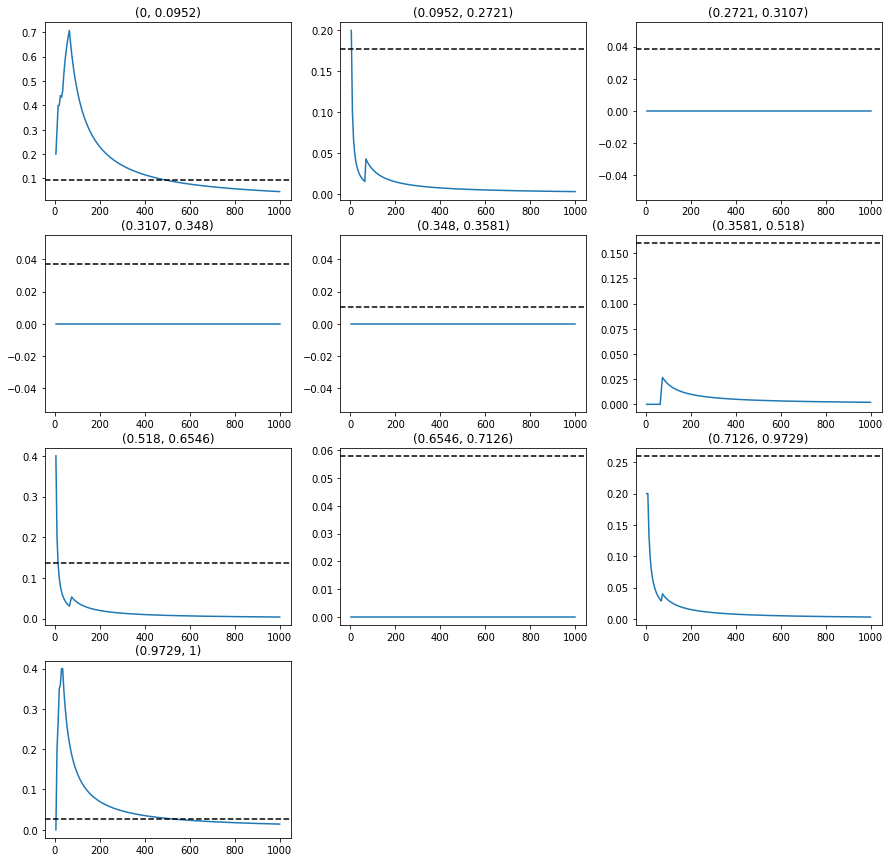

In [6]:
N = 1000

def first_N_terms_golden_ratio(N):
    result = []
    golden_ratio = (1 + np.sqrt(5)) / 2
    for i in np.arange(1, N+1):
        result.append(golden_ratio**i - math.floor(golden_ratio**i))
    return result

sequence_golden_ratio = first_N_terms_golden_ratio(N)
visualize_equidistribution(sequence_golden_ratio, 10, 5)

The scatter plot already reveals uneven distribution of the sequence, and other plots examining convergence show that $\frac{\#\{1\leq n\leq N: \xi_n\in(a,b)\}}{N}$ converges to the wrong limit over some subintervals.

**Proposition 1.5**: For any $a\neq0$, the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle a\log{n}\rangle$, is not equidistributed in $[0, 1)$.

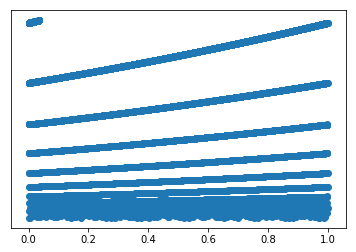

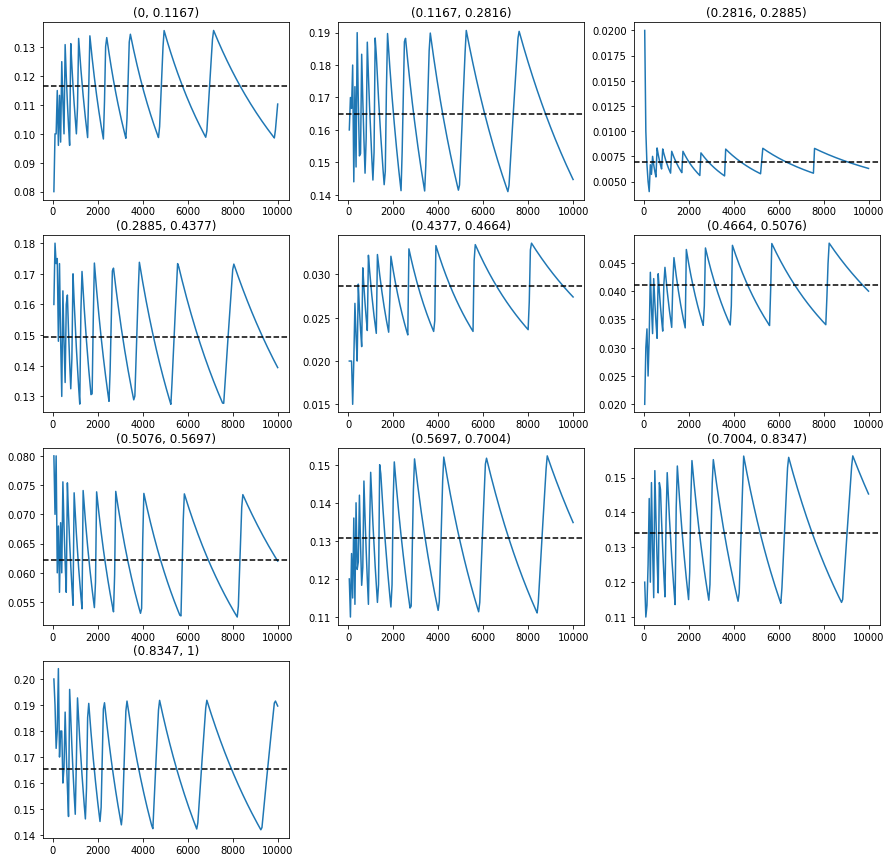

In [7]:
N = 10000
a = math.exp(1)

def first_N_terms_log(a, N):
    result = []
    for i in np.arange(1, N + 1):
        result.append(a * np.log(i) - math.floor(a * np.log(i)))
    return result

sequence_log = first_N_terms_log(a, N)
visualize_equidistribution(sequence_log, 10, 50)

Once again the scatter plot indicates uneven distribution of the sequence, and other plots examining convergence show that $\frac{\#\{1\leq n\leq N: \xi_n\in(a,b)\}}{N}$ does not even converge over most subintervals.

**Proposition 1.6:** For every $a\neq0$, and $\sigma$ with $0<\sigma<1$, the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle an^\sigma\rangle$, is equidistributed in $[0, 1)$.  

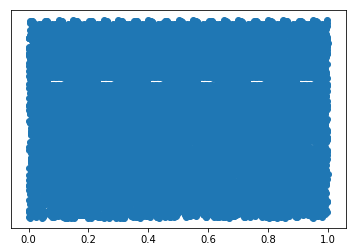

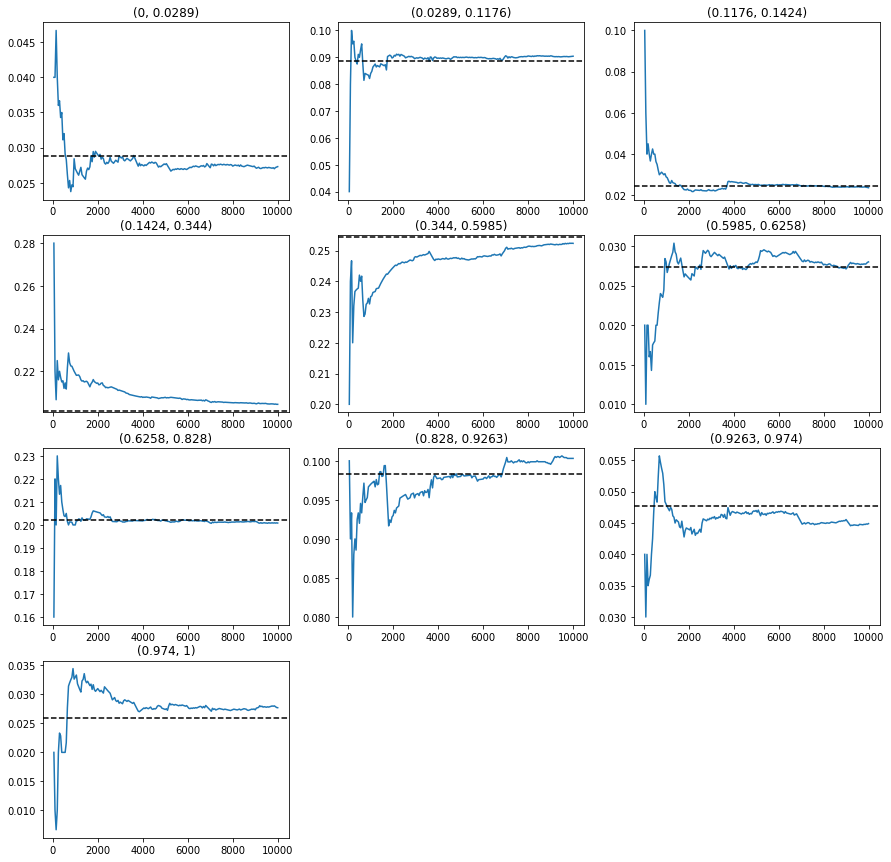

In [8]:
N = 10000
a = math.pi
sigma = np.sqrt(2) / 2

def first_N_terms_sigma(a, sigma, N):
    result = []
    for i in np.arange(1, N + 1):
        result.append(a * (i ** sigma) - math.floor(a * (i ** sigma)))
    return result

sequence_sigma = first_N_terms_sigma(a, sigma, N)
visualize_equidistribution(sequence_sigma, 10, 50)

The scatter plot suggests that we are looking at an equidistributed sequence, and in other plots, convergence is obvious.

**Proposition 1.7:** If $\gamma$ is an irrational number, then the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle n^2\gamma\rangle$, is equidistributed in $[0, 1)$.

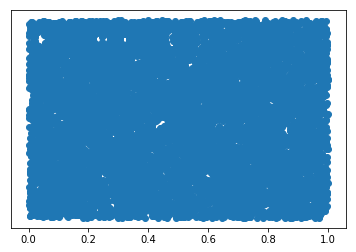

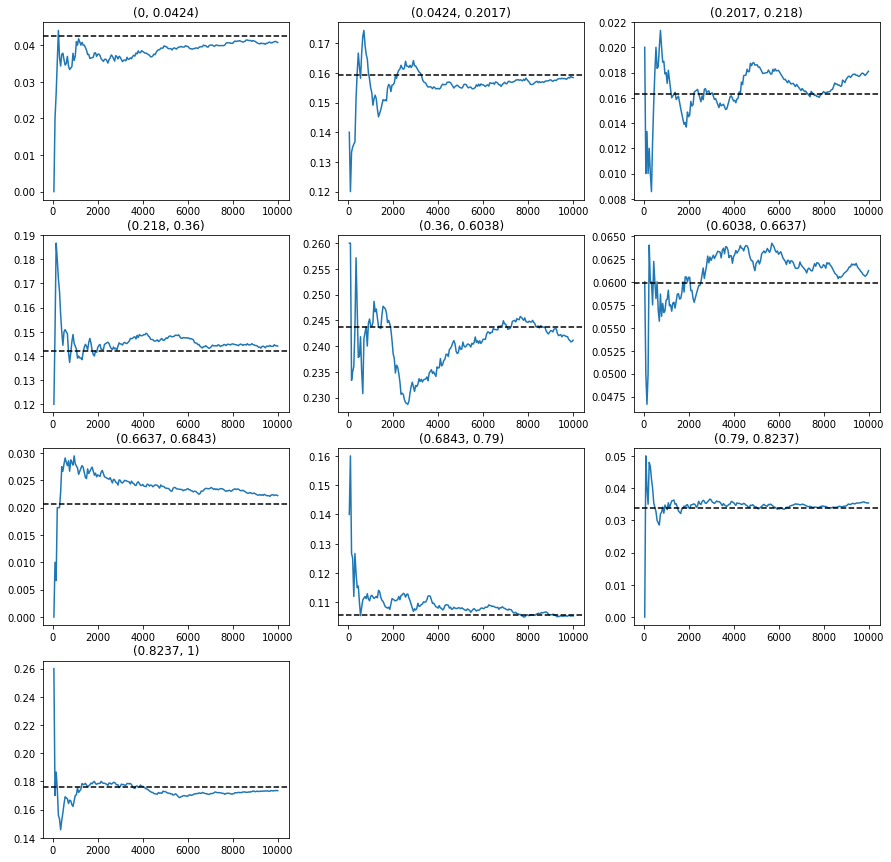

In [9]:
gamma = math.exp(1)
N = 10000

def first_N_terms_weyl_squared(gamma, N):
    result = []
    for i in np.arange(1, N + 1):
        result.append((i ** 2) * gamma - math.floor((i ** 2) * gamma))
    return result

sequence_weyl_squared = first_N_terms_weyl_squared(gamma, N)
visualize_equidistribution(sequence_weyl_squared, 10, 50)

Like the sequence in proposition 1.6, the scatter plot suggests that we are looking at an equidistributed sequence, and in other plots, convergence is obvious.

**Proposition 1.8:** Suppose $P(x) = c_nx^n + ... +c_0$ is a polynomial with real coefficients, where at least one of $c_1,...,c_n$ is irrational, then the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle P(n)\rangle$, is equidistributed in $[0, 1)$.

In [10]:
# coefficients = []
# N = 

# def first_N_terms_polynomial(coefficients, N):
#     result = []
#     for i in np.arange(1, N + 1):
#         poly = 

Weyl's Equidistribuiton Theorem is introduced to me in an introductory course to Fourier analysis as the way we prove this theorem is a nice application of convergence of Fourier series. The following two theorems are from an analytic number theory course, which are quite surprising results (at least to me) that are much more difficult to prove. 

## 2. Prime Number Theorem
Probably the most surprising and elegant result in my entire analytic number theory course. Prime Number Theorem tells us the asymptotic behavior of number of primes up to $x$ as $x\rightarrow \infty$. <br>

**Theorem 2.1 (Prime Number Theorem):** Let $\pi(x) = \#\{p \textit{ prime}: p\leq x\}$ number of primes up to x, then

$$
\lim_{x\to\infty} \frac{\pi(x)}{x/\ln(x)} = 1
$$

There is a weaker version of Prime Number Theorem that does not establish the limit but bounds on $\pi(x)$. <br>

**Theorem 2.2 (Chebyshev's Theorem):** For $x\gg\ 0$, there exist constants $A, B > 0$ such that 

$$
A\frac{x}{\ln(x)} < \pi(x) < B\frac{x}{\ln(x)}
$$

Proof of Chebyshev's Theorem is slightly easier, and it makes very good use of the **Von Mangoldt function**: 

$$
\Lambda(n) = 
\begin{cases}
    \ln(p) & \text{if } n = p^r \text{ for some prime } p \text{ and } r \geq 1 \\
    0 & \text{otherwise} 
\end{cases}
$$

Proof of Prime Number Theorem requires more work, which eventually makes use of the **Wiener-Ikehara Theorem** in complex analysis. <br>
If we look at Prime Number Theorem, not only does the number of primes up to x magically have some asymptotic behavior, it also relates to $\ln(x)$, which once again establishes the importance and beauty of $e$.

In [11]:
def sieve(n):
    """Return primes up to n using an elementary sieve method."""
    
    n = math.floor(n)
    primes = [True for i in range(n + 1)]
    p = 2
    while p * p <= n:
        if primes[p] == True:
            for i in range(p * 2, n + 1, p):
                primes[i] = False
        p += 1
    primes[0], primes[1] = False, False
    return [num for num in range(n + 1) if primes[num]]

In [12]:
def visualize_prime_thm(N, step_size):
    """Visualize the behavior of the quantity in question given an upper limit N and step size. The dashed line is
    the expected limit."""
    
    primes = sieve(N)
    steps = np.linspace(2, N, step_size)
    result = [len([y for y in primes if y <= x]) / (x / np.log(x)) for x in steps]
    plt.plot(steps, result)
    plt.axhline(1, color='black', ls = '--')
    plt.show()

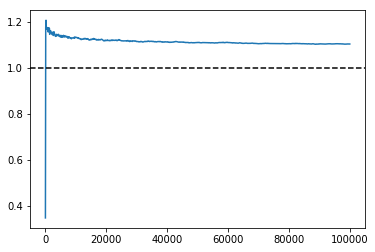

In [13]:
visualize_prime_thm(100000, 1000)